In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("C://Users//sonuv//Desktop//TOP MENTOR//train.csv", index_col='id')
data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
data.shape

(381109, 11)

In [4]:
duplicated_rows=data[data.duplicated()]
print(duplicated_rows.shape)

(269, 11)


In [5]:
data.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [6]:
data['Gender'].value_counts()

Male      206089
Female    175020
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

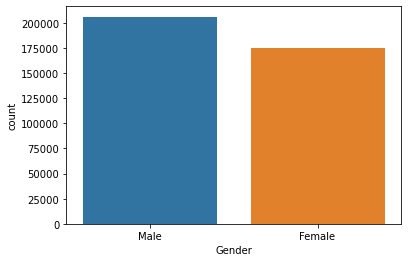

In [7]:
sns.countplot(data=data, x='Gender')

<AxesSubplot:ylabel='Frequency'>

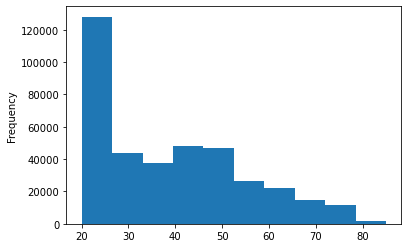

In [8]:
data['Age'].plot.hist()

In [9]:
data['Driving_License'].value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

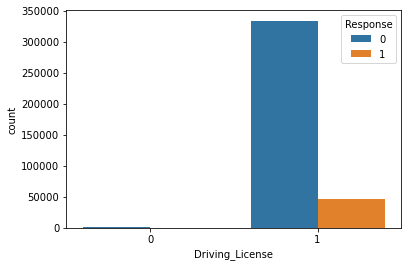

In [10]:
sns.countplot(data=data, x='Driving_License',hue='Response')

In [11]:
## ALMOST ALL PEOPLE HAVE DRIVING LICENSE.. THAT'S GOOD

In [12]:
data['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

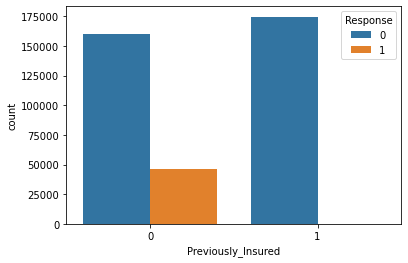

In [13]:
sns.countplot(data=data, x='Previously_Insured',hue='Response')

In [14]:
##THERE ARE MORE NUMBER OF PEOPLE WHO HAVE NO INSURANCE POLICY

In [15]:
data.groupby(['Vehicle_Age','Response'])['Gender'].count().to_frame()

Gender
Vehicle_Age Response        
1-2 Year    0         165510
            1          34806
< 1 Year    0         157584
            1           7202
> 2 Years   0          11305
            1           4702

In [16]:
## we see that people having vehicles 1-2 years old have taken insurance.
## overall very less number of people have shown interest in taking insurance, most of them have not taken insurance.

In [17]:
data['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

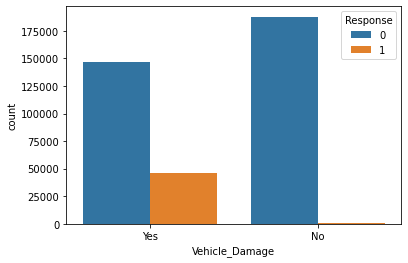

In [18]:
sns.countplot(data=data, x='Vehicle_Damage',hue='Response')

In [19]:
data['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

C:\Users\sonuv\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

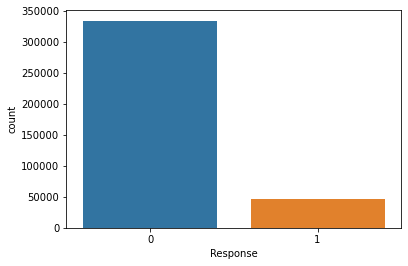

In [20]:
sns.countplot(data['Response'])

In [21]:
## THE DATASET IS HIGHLY IMBALANCED. WE  WILL NEED TO TREATE IT BEFORE APPLYING MACHINE LEARNING ALGO.
## BECAUSE THIS IMBALANCE WILL LEAD TO POOR PERFORMANCE OF MODEL.


<AxesSubplot:>

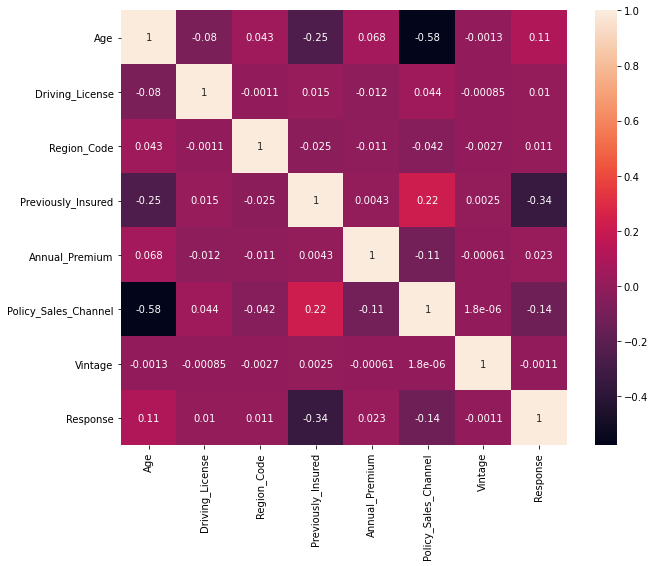

In [22]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True)

In [23]:
data.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
Age,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


In [24]:
## One hot encoding

In [25]:
Gender=pd.get_dummies(data['Gender'],drop_first=True)
Gender

,Male
id,
1,1
2,1
3,1
4,1
5,0
...,...
381105,1
381106,1
381107,1


In [26]:
Vehicle_Age=pd.get_dummies(data['Vehicle_Age'],drop_first=True)
Vehicle_Age

,< 1 Year,> 2 Years
id,,
1,0,1
2,0,0
3,0,1
4,1,0
5,1,0
...,...,...
381105,0,0
381106,1,0
381107,1,0


In [27]:
Vehicle_Damage=pd.get_dummies(data['Vehicle_Damage'],drop_first=True)
Vehicle_Damage

,Yes
id,
1,1
2,0
3,1
4,0
5,0
...,...
381105,0
381106,0
381107,0


In [28]:
Data=pd.concat([data, Gender,Vehicle_Age,Vehicle_Damage],axis=1)
Data.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
id,,,,,,,,,,,,,,,
1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,0,1,1
2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0,0
3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,0,1,1
4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,1,0,0
5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,1,0,0


In [29]:
Data.drop(['Gender','Vehicle_Age','Vehicle_Damage'],axis=1,inplace=True)

In [30]:
Data.head()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
id,,,,,,,,,,,,
1,44,1,28.0,0,40454.0,26.0,217,1,1,0,1,1
2,76,1,3.0,0,33536.0,26.0,183,0,1,0,0,0
3,47,1,28.0,0,38294.0,26.0,27,1,1,0,1,1
4,21,1,11.0,1,28619.0,152.0,203,0,1,1,0,0
5,29,1,41.0,1,27496.0,152.0,39,0,0,1,0,0


In [31]:
### checking for outliers

<AxesSubplot:xlabel='Age'>

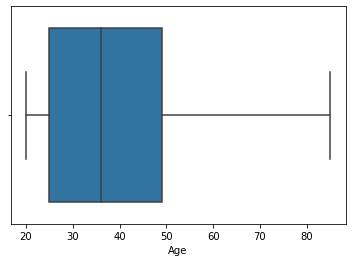

In [32]:
sns.boxplot(x=Data['Age'])                   # No outliers in Age

<AxesSubplot:xlabel='Region_Code'>

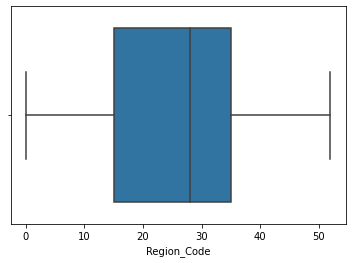

In [33]:
sns.boxplot(x=Data['Region_Code'])                   # No outliers

<AxesSubplot:xlabel='Annual_Premium'>

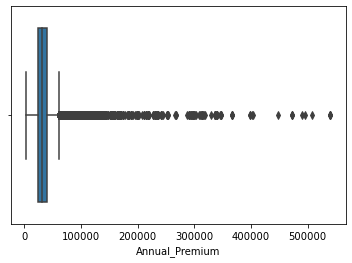

In [34]:
sns.boxplot(x=Data['Annual_Premium'])             #outliers observed

<AxesSubplot:xlabel='Policy_Sales_Channel'>

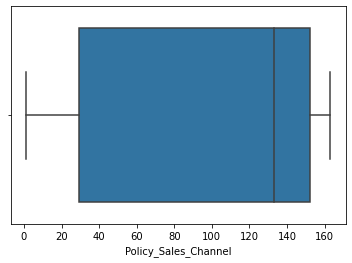

In [35]:
sns.boxplot(x=Data['Policy_Sales_Channel'])             #No outliers

<AxesSubplot:xlabel='Vintage'>

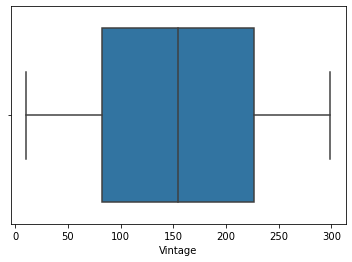

In [36]:
sns.boxplot(x=Data['Vintage'])  

In [37]:
## Feature scaling

from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler=MinMaxScaler()

In [39]:
Data_scaled=Data.copy()
Data_scaled

col=['Age', 'Region_Code','Annual_Premium','Policy_Sales_Channel','Vintage']
features=Data_scaled[col]
features

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage
id,,,,,
1,44,28.0,40454.0,26.0,217
2,76,3.0,33536.0,26.0,183
3,47,28.0,38294.0,26.0,27
4,21,11.0,28619.0,152.0,203
5,29,41.0,27496.0,152.0,39
...,...,...,...,...,...
381105,74,26.0,30170.0,26.0,88
381106,30,37.0,40016.0,152.0,131
381107,21,30.0,35118.0,160.0,161


In [40]:
Data_scaled[col] = scaler.fit_transform(features)

In [41]:
Data_scaled

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Male,< 1 Year,> 2 Years,Yes
id,,,,,,,,,,,,
1,0.369231,1,0.538462,0,0.070366,0.154321,0.716263,1,1,0,1,1
2,0.861538,1,0.057692,0,0.057496,0.154321,0.598616,0,1,0,0,0
3,0.415385,1,0.538462,0,0.066347,0.154321,0.058824,1,1,0,1,1
4,0.015385,1,0.211538,1,0.048348,0.932099,0.667820,0,1,1,0,0
5,0.138462,1,0.788462,1,0.046259,0.932099,0.100346,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381105,0.830769,1,0.500000,1,0.051234,0.154321,0.269896,0,1,0,0,0
381106,0.153846,1,0.711538,1,0.069551,0.932099,0.418685,0,1,1,0,0
381107,0.015385,1,0.576923,1,0.060439,0.981481,0.522491,0,1,1,0,0


In [42]:
X=Data_scaled.drop('Response',axis=1)
y=Data_scaled['Response']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split the data into train data and test data
# Used stratify argument to split the data proportionately based on response variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21,stratify=y)


In [45]:
X_train.shape, y_train.shape

((304887, 11), (304887,))

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
logmodel=LogisticRegression()

In [48]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [49]:
y_pred=logmodel.predict(X_test)

In [50]:
pd.DataFrame(y_pred)

,0
0,0
1,0
2,0
3,0
4,0
...,...
76217,0
76218,0
76219,0
76220,0


In [51]:
pd.Series(y_pred).value_counts()

0    76217
1        5
dtype: int64

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66880
           1       0.20      0.00      0.00      9342

    accuracy                           0.88     76222
   macro avg       0.54      0.50      0.47     76222
weighted avg       0.79      0.88      0.82     76222



In [53]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[66876     4]
 [ 9341     1]]


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8773976017422791

In [55]:
##Handling Imbalanced Data with SMOTE

In [56]:
X=Data_scaled.drop('Response',axis=1)
y=Data_scaled['Response']

In [57]:
print("Before OverSampling, counts of label '1': ",(sum(y == 1))) 
print("Before OverSampling, counts of label '0': ",(sum(y == 0))) 

Before OverSampling, counts of label '1':  46710
Before OverSampling, counts of label '0':  334399


In [59]:
!pip install imblearn

In [60]:
from imblearn.over_sampling import SMOTE 

In [61]:
sm=SMOTE(random_state=12)

In [62]:
X_smote,y_smote=sm.fit_resample(X,y)

In [63]:
X_smote.shape,y_smote.shape

((668798, 11), (668798,))

In [64]:
print("After OverSampling, counts of label '1': ",(sum(y_smote == 1))) 
print("After OverSampling, counts of label '0': ",(sum(y_smote == 0))) 

After OverSampling, counts of label '1':  334399
After OverSampling, counts of label '0':  334399


In [65]:
X_train, X_test, y_train, y_test=train_test_split(X_smote, y_smote, test_size=0.25,random_state=23)

In [66]:
X_train.shape,y_train.shape

((501598, 11), (501598,))

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [68]:
model=LogisticRegression()
model1=DecisionTreeClassifier()
model2=KNeighborsClassifier()
model3=RandomForestClassifier()

In [69]:
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [72]:
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [73]:
model3.fit(X_train,y_train)

RandomForestClassifier()

In [74]:
y_pred=model.predict(X_test)
y_pred1=model1.predict(X_test)
y_pred2=model2.predict(X_test)
y_pred3=model3.predict(X_test)

In [76]:
Predicted_Response=pd.DataFrame({'Actual Response': y_test,'Logistic Reg Response':y_pred, 'Decision Tree Respponse':y_pred1, 'KNN Response':y_pred2, 'Random Forest Response':y_pred3})

In [77]:
Predicted_Response

,Actual Response,Logistic Reg Response,Decision Tree Respponse,KNN Response,Random Forest Response
149933,0,1,0,1,1
49171,0,0,0,0,0
520169,1,1,1,1,1
453752,1,1,1,1,1
450431,1,1,1,1,1
...,...,...,...,...,...
435344,1,1,1,1,1
215120,0,0,0,0,0
383289,1,1,1,0,1
132065,0,0,0,0,0


In [78]:
# count number of predicted interested customers

In [79]:
pd.DataFrame(y_pred).value_counts()

1    115221
0     51979
dtype: int64

In [80]:
pd.DataFrame(y_pred1).value_counts()

1    85205
0    81995
dtype: int64

In [81]:
pd.DataFrame(y_pred2).value_counts()

1    101678
0     65522
dtype: int64

In [82]:
pd.DataFrame(y_pred3).value_counts()

1    88507
0    78693
dtype: int64

In [83]:
# ACcuracy score for all model

In [84]:
print(accuracy_score(y_test, y_pred))  #for logistic regression

0.783433014354067


In [85]:
print(accuracy_score(y_test, y_pred1))  #for Decision tree classifier

0.8849880382775119


In [86]:
print(accuracy_score(y_test, y_pred2))   #for Kneighbours classifier

0.8638337320574163


In [87]:
print(accuracy_score(y_test, y_pred3))    #for Random Forest classifier

0.9075


In [88]:
print(confusion_matrix(y_test,y_pred))

[[49733 33964]
 [ 2246 81257]]


In [89]:
print(confusion_matrix(y_test,y_pred1))

[[73231 10466]
 [ 8764 74739]]


In [90]:
print(confusion_matrix(y_test,y_pred2))

[[63226 20471]
 [ 2296 81207]]


In [91]:
print(confusion_matrix(y_test,y_pred3))

[[73462 10235]
 [ 5231 78272]]


In [98]:
Predicted_Response.to_csv("C://Users//sonuv//Desktop//TOP MENTOR//Vehicle_insurance_prediction.csv")